<a href="https://colab.research.google.com/github/aaaraafaat/ML--Learning_Base/blob/main/Digit_Classification_with_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem :
Classify digits (0 to 9) using KNN classifier.
From sklearn.datasets load digits dataset and do following

Classify digits (0 to 9) using KNN classifier. You can use different
values for k neighbors and need to figure out a value of K that gives
you a maximum score. You can manually try different values of K or use
gridsearchcv
*Plot confusion matrix
*Plot classification report

**Solution**
Part 1: Loading and Understanding the Data 📂
This is like getting the flashcards to teach the child.

Part 1: Load Libraries and Data 📚
First, we need to import the necessary tools and load the dataset. sklearn provides the dataset and the machine learning model, while pandas helps us organize the data into a table.

In [4]:
# Import the pandas library to work with data in tables (DataFrames)
import pandas as pd
# From the scikit-learn library, import the function to load the digits dataset
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt


In [3]:
# Load the dataset and store it in a variable called 'digits'
digits = load_digits()

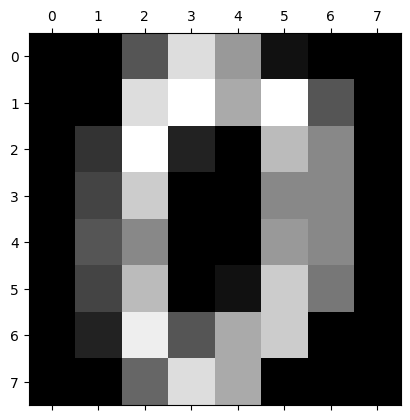

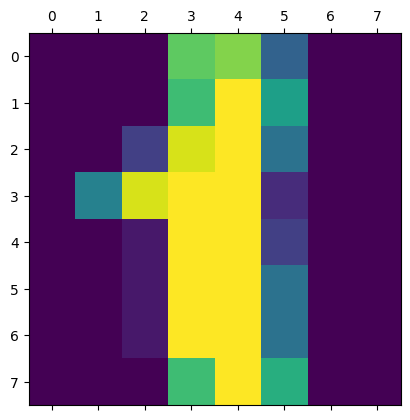

In [21]:
plt.matshow(digits.images[0], cmap="gray")
plt.show()
plt.matshow(digits.images[1])
plt.show()
#seeing how it looks

Part 2: Prepare the Data for Training 쪼
Computers see images as a collection of pixel values. We'll organize this pixel data and the correct answers (targets) into a single table, called a DataFrame. Then, we'll split this data into a "training" set for teaching the model and a "testing" set for evaluating it.

digits.data: This is the pixel data for each image (the 64 features).
digits.target: This is the correct label for each image (the actual number, 0 through 9).

In [7]:
# Create a DataFrame. The data is the pixel values (digits.data)
# and the labels for each row are the correct digits (digits.target).
df = pd.DataFrame(digits.data, digits.target)
df


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


The computer doesn't see an "image." It sees a bunch of numbers representing pixel brightness. Each 8x8 image is "flattened" into a list of 64 numbers (8 * 8 = 64). This code does two things:

digits.data: This is the pixel data for each image (the 64 features).


In [9]:
# Add a 'target' column to the DataFrame containing the correct answer for each image.
df['target'] = digits.target
df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
0,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
8,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
9,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


digits.target: This is the correct label for each image (the actual number, 0 through 9).
The code puts all this into a neat table (DataFrame) so it's easy to look at. The target column is added so we know the correct answer for each row of pixel data.**bold text**

In [10]:
# Import the tool for splitting data
from sklearn.model_selection import train_test_split

# Split the data.
# X is our features (all columns EXCEPT 'target').
# y is our label (ONLY the 'target' column).
# We set aside 30% of the data for testing (test_size=0.3).
# random_state=10 ensures that the split is the same every time we run the code.
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis='columns'), df.target, test_size=0.3, random_state=10)

Part 3: Create and Train the KNN Model 🧠
Create our K-Nearest Neighbors (KNN) classifier. We'll set K to 5, meaning the model will look at the 5 nearest neighbors to make a prediction. The .fit() step is where the model "learns" by memorizing the training data.

In [11]:
# Import the K-Nearest Neighbors classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNN model.
# n_neighbors=5 tells the model to look at the 5 closest data points to make a decision.
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training data.
# knn.fit learns the relationship between the images (X_train) and their labels (y_train).
knn.fit(X_train, y_train)

KNeighborsClassifier()

Part 4: Evaluate the Model's Performance ✅
We use the test data, which the model has never seen, to see how accurately it can predict the digits. We will check the overall accuracy, create a confusion matrix to see where it made mistakes, and print a detailed report.

In [18]:
# Use the trained model to get an accuracy score on the test data.
# It compares the model's predictions to the true answers (y_test).
accuracy = knn.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.987037037037037


Model accuracy is the most straightforward metric for evaluating a classification model. It simply measures the percentage of predictions that the model got right.

Think of it like a grade on a multiple-choice test. If you answer 90 out of 100 questions correctly, your grade is 90%. Similarly, if a model makes predictions on 100 data points and is correct on 90 of them, its accuracy is 90%.



Accuracy=
Total Number of Predictions /
Number of Correct Predictions
​


In [15]:
# --- Confusion Matrix ---
# Import the confusion_matrix function to see where the model gets confused.
from sklearn.metrics import confusion_matrix

# Get the model's predictions for the test set.
y_pred = knn.predict(X_test)

# Create the confusion matrix by comparing true labels (y_test) with predictions (y_pred).
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[51  0  0  0  0  0  0  0  0  0]
 [ 0 56  0  0  0  1  0  0  0  0]
 [ 0  0 55  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  0  0  0]
 [ 0  0  0  0 50  0  0  0  1  0]
 [ 0  0  0  0  0 50  0  0  0  1]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  0  0  0  0 60  0  0]
 [ 0  1  0  1  0  0  0  0 48  0]
 [ 0  0  0  0  0  1  0  0  1 52]]


A confusion matrix shows you where your model is succeeding and where it's failing.

The numbers on the main diagonal (top-left to bottom-right) are all the correct predictions.

Any number off the diagonal is a mistake, where the model confused one class for another.

Your goal is to find the largest numbers off the diagonal to see which specific errors the model makes most often.

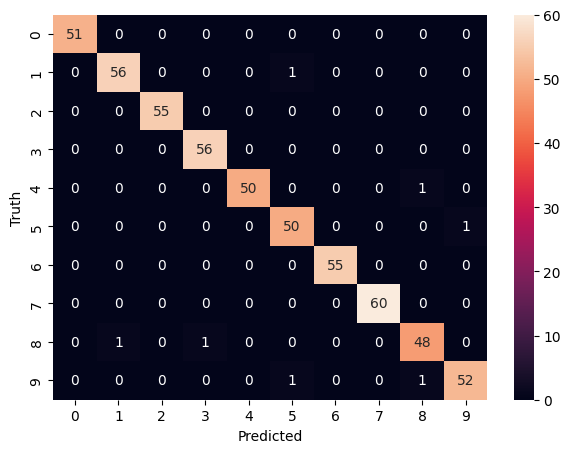

In [16]:
# --- Visualization of Confusion Matrix ---
# Import libraries for plotting.
import matplotlib.pyplot as plt
import seaborn as sn

# Set up the plot size.
plt.figure(figsize=(7, 5))
# Use seaborn to create a heatmap for the confusion matrix. annot=True shows the numbers in each box.
sn.heatmap(cm, annot=True)
# Label the x and y axes.
plt.xlabel('Predicted')
plt.ylabel('Truth')
# Show the plot.
plt.show()

**Classification Report**

Precision: This measures the accuracy of the model's positive predictions. It answers the question: "When the model predicted a certain digit, how often was it correct?"

Recall: This measures the model's ability to find all relevant instances of a class. It answers the question: "Of all the actual 7s in the data, how many did the model correctly identify as a 7?"

F1-Score: This is a single, balanced score of both Precision and Recall. It's useful when you need to consider both how accurate the model's predictions are and how many it missed.

Support: This is simply the total number of actual examples for each class in your test data. It gives you context on how reliable the other scores are for that class.

In [17]:

# --- Classification Report ---
# Import the classification_report for more detailed metrics.
from sklearn.metrics import classification_report

# Print the report, which includes precision, recall, and f1-score for each digit.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       0.98      0.98      0.98        57
           2       1.00      1.00      1.00        55
           3       0.98      1.00      0.99        56
           4       1.00      0.98      0.99        51
           5       0.96      0.98      0.97        51
           6       1.00      1.00      1.00        55
           7       1.00      1.00      1.00        60
           8       0.96      0.96      0.96        50
           9       0.98      0.96      0.97        54

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



macro avg (Macro Average): This is the simple average of the metric (e.g., precision) across all classes. It calculates the score for each class individually and then divides by the number of classes, treating every class as equally important, regardless of how many samples it has.

weighted avg (Weighted Average): This is also an average, but it's calculated by giving more weight to the classes with more samples (higher support). This score is more influenced by the model's performance on the more common classes in your data. It's often a better reflection of the model's overall real-world performance.

accuracy: This is the most straightforward metric. It's simply the total number of correct predictions divided by the total number of predictions made. It tells you the overall percentage of the time the model was right.